In [1]:
import pandas as pd
import re
import datetime
import numpy as np

In [2]:
from PIL import Image

In [29]:
img = Image.open('../file/gyeonggi.jpg')
img2 = Image.open('../file/seoul.jpg')
img3 = Image.open('../file/incheon.jpg')

In [24]:
import matplotlib.pyplot as plt

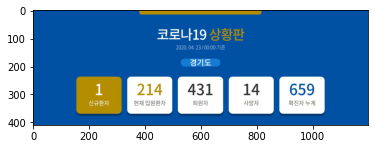

In [30]:
plt.imshow(img)
plt.show()

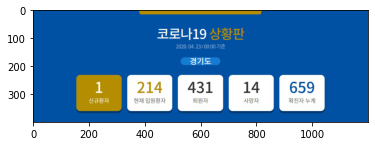

In [31]:
# resize 할 이미지 사이즈 
resize_image = img.resize((1200, 400))
plt.imshow(resize_image)
plt.show()

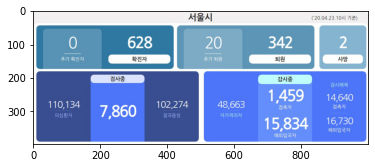

In [32]:
plt.imshow(img2)
plt.show()

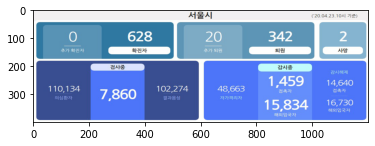

In [33]:
# resize 할 이미지 사이즈 
resize_image = img2.resize((1200, 400))
plt.imshow(resize_image)
plt.show()

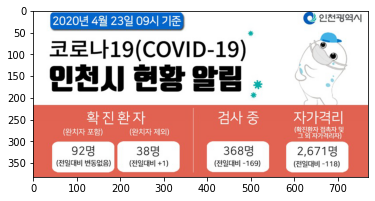

In [34]:
plt.imshow(img3)
plt.show()

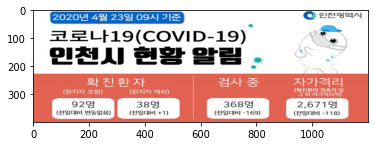

In [35]:
# resize 할 이미지 사이즈 
resize_image = img3.resize((1200, 400))
plt.imshow(resize_image)
plt.show()

In [2]:
gyeonggi = pd.read_csv('./data/gyeonggi.csv')

In [3]:
gyeonggi.head()

,confirmed_date,province,city,sex,age
0,4.12,경기,김포시,여,22
1,4.12,경기,구리시,여,79
2,4.12,경기,안성시,여,69
3,4.12,경기,양주시,여,53
4,4.12,경기,성남시,여,25


In [4]:
regex = re.compile('\d.\d+')

gyeonggi['confirmed_date'] = gyeonggi['confirmed_date'].apply(lambda x: regex.search(x.strip()).group())
gyeonggi['confirmed_date'] = gyeonggi['confirmed_date'].apply(lambda x: '2020.'+x)
gyeonggi['confirmed_date']= pd.to_datetime(gyeonggi['confirmed_date'], format='%Y.%m.%d')

In [5]:
gyeonggi.head()

,confirmed_date,province,city,sex,age
0,2020-04-12,경기,김포시,여,22
1,2020-04-12,경기,구리시,여,79
2,2020-04-12,경기,안성시,여,69
3,2020-04-12,경기,양주시,여,53
4,2020-04-12,경기,성남시,여,25


In [9]:
set(gyeonggi['city'])

{'가평군',
 '고양시',
 '과천시',
 '광명시',
 '광주시',
 '구리시',
 '군포시',
 '김포시',
 '남양주시',
 '동두천시',
 '부천시',
 '성남시',
 '수원시',
 '시흥시',
 '안산시',
 '안성시',
 '안양시',
 '양주시',
 '오산시',
 '용인시',
 '의왕시',
 '의정부시',
 '이천시',
 '파주시',
 '평택시',
 '포천시',
 '하남시',
 '화성시'}

In [10]:
day_gyeonggi = gyeonggi.groupby(['confirmed_date', 'city'])['city'].count().reset_index(name="count")
day_gyeonggi['cum_count'] = day_gyeonggi['count'].iloc[::1].groupby(day_gyeonggi['city']).cumsum()

day_gyeonggi = day_gyeonggi.pivot(index='confirmed_date', columns='city', values='cum_count')
day_gyeonggi = day_gyeonggi.fillna(method='pad').fillna(0)

idx = pd.date_range(day_gyeonggi.index.min(), day_gyeonggi.index.max())
day_gyeonggi = day_gyeonggi.reindex(idx, method='pad')

day_gyeonggi = day_gyeonggi.stack().reset_index()
day_gyeonggi.columns = ['confirmed_date', 'city', 'cum_count']

In [11]:
day3_idx = pd.date_range(start=day_gyeonggi['confirmed_date'].min(),
                        periods=len(day_gyeonggi.set_index('confirmed_date').resample('3D').first()), 
                        freq='3D')
day7_idx = pd.date_range(day_gyeonggi['confirmed_date'].min(), 
                        periods=len(day_gyeonggi.set_index('confirmed_date').resample('7D').first()), 
                        freq='7D')
day15_idx = pd.date_range(day_gyeonggi['confirmed_date'].min(), 
                        periods=len(day_gyeonggi.set_index('confirmed_date').resample('15D').first()), 
                        freq='15D')

In [12]:
day3_gyeonggi= day_gyeonggi.set_index('confirmed_date').loc[day3_idx].reset_index()
day7_gyeonggi= day_gyeonggi.set_index('confirmed_date').loc[day7_idx].reset_index()
day15_gyeonggi= day_gyeonggi.set_index('confirmed_date').loc[day15_idx].reset_index()


day_gyeonggi['confirmed_date'] = day_gyeonggi['confirmed_date'].astype(str)
day3_gyeonggi['confirmed_date'] = day3_gyeonggi['confirmed_date'].astype(str)
day7_gyeonggi['confirmed_date'] = day7_gyeonggi['confirmed_date'].astype(str)
day15_gyeonggi['confirmed_date'] = day15_gyeonggi['confirmed_date'].astype(str)

In [19]:
def plot_confirmed(df):
    fig = px.bar(df,
             x="city", y="cum_count",
             animation_frame="confirmed_date",
             animation_group="city",
             range_y=[0, df['cum_count'].max()+5])
    fig.update_layout(title_text='Inferenced Peoples In Seoul City With Animation Bar Plot', showlegend=False)
    fig.update_xaxes(tickangle=45, title_text="Time Axis")
    fig.update_yaxes(tickangle=15, ticksuffix="명", title_text="Inferenced Peoples")

    return fig

In [16]:
import plotly.express as px

In [20]:
plot_confirmed(day7_gyeonggi)

In [48]:
incheon = pd.read_csv('./data/incheon.csv')

In [50]:
incheon.loc[incheon['city']=='강화군']

,confirmed_date,province,city,sex,age
1,2020.04.10,인천,강화군,남,29


In [30]:
incheon.head()

,confirmed_date,province,city,sex,age
0,2020.04.12,인천,연수구,남,62
1,2020.04.10,인천,강화군,남,29
2,2020.04.09,인천,부평구,남,93
3,2020.04.09,인천,남동구,여,68
4,2020.04.07,인천,부평구,여,43


In [38]:
incheon['city'].value_counts().index

Index(['연수구', '부평구', '서구', '남동구', '미추홀구', '계양구', '중구', '동구', '미추홀', '경기도시흥시',
       '강화군'],
      dtype='object')

In [39]:
incheon_gu =['연수구', '부평구', '서구', '남동구', '미추홀구', '계양구', '중구', '동구', '부평구','강화군','웅진군']

In [34]:
regex = re.compile('\d+.\d+.\d+')
incheon['confirmed_date'] = incheon['confirmed_date'].apply(lambda x: regex.search(x.strip()).group())
incheon['confirmed_date']= pd.to_datetime(incheon['confirmed_date'], format='%Y.%m.%d')

In [35]:
incheon.head()

,confirmed_date,province,city,sex,age
0,2020-04-12,인천,연수구,남,62
1,2020-04-10,인천,강화군,남,29
2,2020-04-09,인천,부평구,남,93
3,2020-04-09,인천,남동구,여,68
4,2020-04-07,인천,부평구,여,43


In [40]:
incheon['city'] = np.where(incheon['city'].isin(incheon_gu), incheon['city'], '기타')

In [41]:
incheon['city'].value_counts()

연수구     22
부평구     17
서구      11
남동구     10
미추홀구    10
계양구      6
중구       5
기타       3
동구       2
강화군      1
Name: city, dtype: int64

In [42]:
day_incheon = incheon.groupby(['confirmed_date', 'city'])['city'].count().reset_index(name="count")
day_incheon['cum_count'] = day_incheon['count'].iloc[::1].groupby(day_incheon['city']).cumsum()

day_incheon = day_incheon.pivot(index='confirmed_date', columns='city', values='cum_count')
day_incheon = day_incheon.fillna(method='pad').fillna(0)

idx = pd.date_range(day_incheon.index.min(), day_incheon.index.max())
day_incheon = day_incheon.reindex(idx, method='pad')

day_incheon = day_incheon.stack().reset_index()
day_incheon.columns = ['confirmed_date', 'city', 'cum_count']

In [43]:
day3_idx = pd.date_range(start=day_incheon['confirmed_date'].min(),
                        periods=len(day_incheon.set_index('confirmed_date').resample('3D').first()), 
                        freq='3D')
day7_idx = pd.date_range(day_incheon['confirmed_date'].min(), 
                        periods=len(day_incheon.set_index('confirmed_date').resample('7D').first()), 
                        freq='7D')
day15_idx = pd.date_range(day_incheon['confirmed_date'].min(), 
                        periods=len(day_incheon.set_index('confirmed_date').resample('15D').first()), 
                        freq='15D')

In [44]:
day3_idx = pd.date_range(start=day_incheon['confirmed_date'].min(),
                            periods=len(day_incheon.set_index('confirmed_date').resample('3D').first()), 
                            freq='3D')
day7_idx = pd.date_range(day_incheon['confirmed_date'].min(), 
                        periods=len(day_incheon.set_index('confirmed_date').resample('7D').first()), 
                        freq='7D')
day15_idx = pd.date_range(day_incheon['confirmed_date'].min(), 
                        periods=len(day_incheon.set_index('confirmed_date').resample('15D').first()), 
                        freq='15D')

In [46]:
day3_incheon= day_incheon.set_index('confirmed_date').loc[day3_idx].reset_index()
day7_incheon= day_incheon.set_index('confirmed_date').loc[day7_idx].reset_index()
day15_incheon= day_incheon.set_index('confirmed_date').loc[day15_idx].reset_index()


day_incheon['confirmed_date'] = day_incheon['confirmed_date'].astype(str)
day3_incheon['confirmed_date'] = day3_incheon['confirmed_date'].astype(str)
day7_incheon['confirmed_date'] = day7_incheon['confirmed_date'].astype(str)
day15_incheon['confirmed_date'] = day15_incheon['confirmed_date'].astype(str)

In [52]:
plot_confirmed(day_incheon)